<a href="https://colab.research.google.com/github/encipher-mithun2003/ML-Development-Program/blob/main/Machine_Learning_Driver_Alert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code for Predicting the driver alert

*   Load the data and liberies
*   Data Preparation and Data Transformation
*   Data Visualization
*   Multivariate Analysis
        *   Classification
             Boosting
             Random Forest
             Hyper Parameter Tuning using Grid Search and Randomized Search






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Load the data

In [ ]:
!unzip '/content/stayalert.zip'

Archive:  /content/stayalert.zip
replace Solution.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Solution.csv            
replace example_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: example_submission.csv  
replace fordTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fordTest.csv            
replace fordTrain.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fordTrain.csv           


In [ ]:
train = pd.read_csv('/content/fordTrain.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [ ]:
train.describe()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


<ipython-input-11-bc6f9bbbbb71>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['P2'])


<Axes: xlabel='P2', ylabel='Density'>

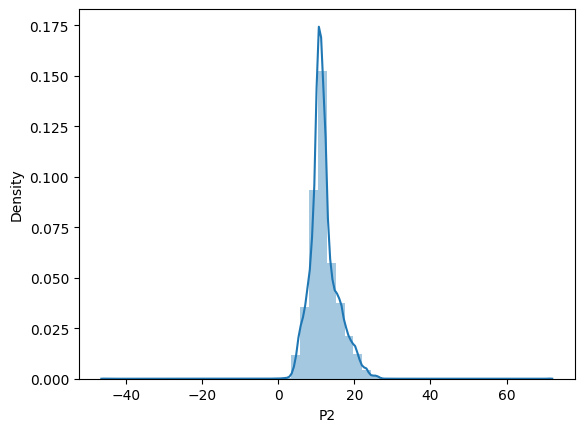

In [ ]:
sns.distplot(train['P2'])

<ipython-input-13-917c5beb365f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['P3'])


<Axes: xlabel='P3', ylabel='Density'>

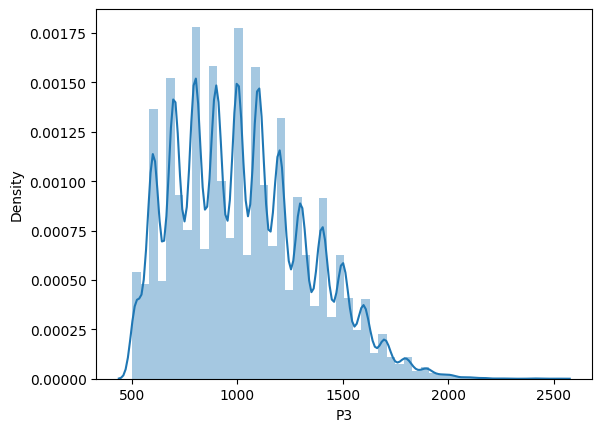

In [ ]:
sns.distplot(train['P3'])

In [ ]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

<Axes: >

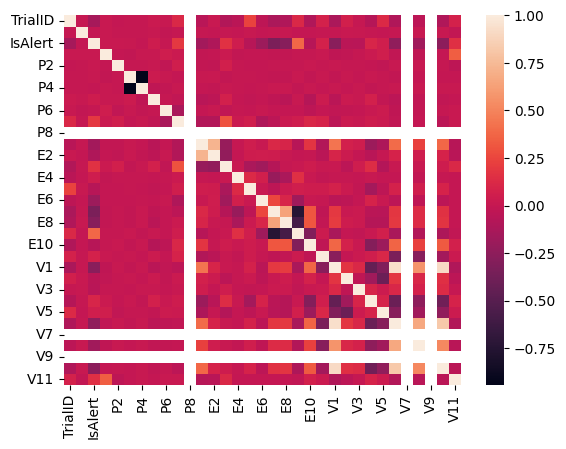

In [ ]:
sns.heatmap(train.corr())

split the data

In [ ]:
x = train.iloc[:,3:]
y = train['IsAlert']

In [ ]:
x.head()

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: IsAlert, dtype: int64

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [ ]:
X_train.head()

,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
474245,33.6176,10.58420,1452,41.3223,0.107678,552,108.6960,0,0.00,0.00,...,-0.455,767,1.48750,1,2140,0,19.9,0,4,12.28910
579937,33.5621,9.01814,896,66.9643,0.132327,600,100.0000,0,0.00,0.00,...,-0.455,511,73.50000,1,768,0,0.0,0,1,17.42420
141497,37.6556,11.69240,1796,33.4076,0.084326,840,71.4286,0,0.00,0.00,...,0.175,496,5.99375,0,1958,0,0.0,0,4,7.92535
140207,46.2718,16.08930,992,60.4839,0.110273,808,74.2574,0,30.58,161.99,...,0.000,240,4.50625,0,2142,0,11.7,0,4,7.85636
205537,57.7422,13.04880,996,60.2410,0.089515,1040,57.6923,0,0.00,0.00,...,-0.175,767,0.00000,0,2003,0,0.0,0,4,10.13300


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(483463, 30)
(120866, 30)
(483463,)
(120866,)


Logistic regression

In [ ]:
#initialize the model
lr = LogisticRegression()
#train the model
lr.fit(X_train,y_train)

Implement the Logistic Regression on test data

In [ ]:
y_hat_train= lr.predict(X_train)
y_hat_test= lr.predict(X_test)

In [ ]:
y_train

474245    1
579937    0
141497    1
140207    0
205537    0
         ..
194278    1
192476    1
17730     1
28030     1
277869    1
Name: IsAlert, Length: 483463, dtype: int64

In [ ]:
y_hat_train

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
def model_eval(actual, predicted):
  acc_score= accuracy_score(actual, predicted)
  conf_matrix= confusion_matrix(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('The Accuracy of the model is: ', acc_score)
  print(conf_matrix)
  print(clas_rep)


Training Accuracy

In [ ]:
model_eval(y_train, y_hat_train)

The Accuracy of the model is:  0.7143090577769137
[[130399  72928]
 [ 65193 214943]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.65    203327
           1       0.75      0.77      0.76    280136

    accuracy                           0.71    483463
   macro avg       0.71      0.70      0.71    483463
weighted avg       0.71      0.71      0.71    483463



Testing Accuracy

In [ ]:
model_eval(y_test, y_hat_test)

The Accuracy of the model is:  0.7142786226068538
[[32998 18219]
 [16315 53334]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.66     51217
           1       0.75      0.77      0.76     69649

    accuracy                           0.71    120866
   macro avg       0.71      0.71      0.71    120866
weighted avg       0.71      0.71      0.71    120866



Random Forest Model

In [ ]:
#Initialize the model
rf = RandomForestClassifier()
#fit the model
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_hat_train_rf = rf.predict(X_train)
y_hat_test_rf = rf.predict(X_test)

Train Accuracy - Random Forest

In [ ]:
model_eval(y_train, y_hat_train_rf)

The Accuracy of the model is:  1.0
[[203327      0]
 [     0 280136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



Test Accuracy

In [ ]:
model_eval(y_test, y_hat_test_rf)

The Accuracy of the model is:  0.9948124369136068
[[50673   544]
 [   83 69566]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51217
           1       0.99      1.00      1.00     69649

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866

